In [28]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#from ESRNN import ESRNN


%store -r dm

dm = dm

data_A = dm.data_A
data_B = dm.data_B
data_C = dm.data_C

In [20]:
data_A["site_a"] = np.ones( len(data_A["pv_measurement"]))
data_A["site_b"] = np.zeros( len(data_A["pv_measurement"]))
data_A["site_c"] = np.zeros( len(data_A["pv_measurement"]))

data_B["site_a"] = np.zeros( len(data_B["pv_measurement"]))
data_B["site_b"] = np.ones( len(data_B["pv_measurement"]))
data_B["site_c"] = np.zeros( len(data_B["pv_measurement"]))

data_C["site_a"] = np.zeros( len(data_C["pv_measurement"]))
data_C["site_b"] = np.zeros( len(data_C["pv_measurement"]))
data_C["site_c"] = np.ones( len(data_C["pv_measurement"]))

data_ABC = pd.concat([data_A, data_B, data_C])


In [21]:
#preparing data

X = data_ABC.iloc[:,2:] #independent columns
y = data_ABC.iloc[:,0]   #target column i.e pv measurement


X_train, X_test, y_train, y_test = train_test_split(X, y)

"""
X_test_A = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
X_test_B = dm.X_test_estimated_b[X_B_train.columns.intersection(dm.X_test_estimated_b.columns)]
X_test_C = dm.X_test_estimated_c[X_C_train.columns.intersection(dm.X_test_estimated_c.columns)]
"""





'\nX_test_A = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]\nX_test_B = dm.X_test_estimated_b[X_B_train.columns.intersection(dm.X_test_estimated_b.columns)]\nX_test_C = dm.X_test_estimated_c[X_C_train.columns.intersection(dm.X_test_estimated_c.columns)]\n'

### ESRNN

In [27]:
modelESRNN = ESRNN()

X_train_df, y_train_df, X_test_df, y_test_df = prepare_m4_data


modelESRNN.fit(X_train, y_df_train)

AssertionError: 

### xgboost

In [8]:
import xgboost as xgb

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
params = {"objective": "reg:squarederror"}


In [12]:
n = 1000
xmodel = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [13]:
xpreds = xmodel.predict(dtest_reg)
xpreds_train = xmodel.predict(dtrain_reg)

xMAE = mean_absolute_error(
    xpreds,
    y_test
)

xMAE_train = mean_absolute_error(
    xpreds_train,
    y_train
)

print("Test MAE score: ", xMAE)
print("Train MAE score: ", xMAE_train)

Test MAE score:  63.36285764052792
Train MAE score:  38.65477607962919


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

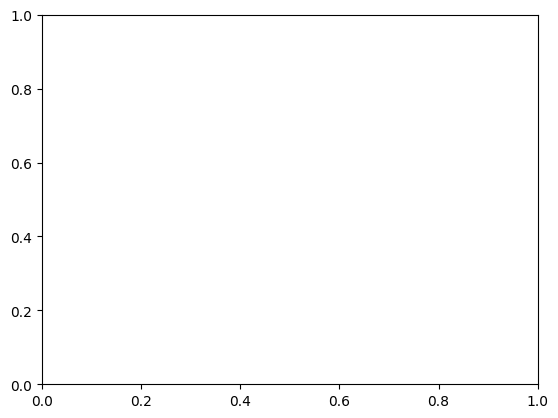

In [31]:
#xgb.plot_importance(xmodel)
xgb.plot_tree(xmodel)

### Normal Catboost

In [126]:
from catboost import CatBoostRegressor



In [135]:
catModel = CatBoostRegressor()

catModel.fit(X_train, y_train)

Learning rate set to 0.099743
0:	learn: 696.3532494	total: 27.2ms	remaining: 27.2s
1:	learn: 643.2247322	total: 44.8ms	remaining: 22.3s
2:	learn: 596.0632694	total: 56.2ms	remaining: 18.7s
3:	learn: 554.6133030	total: 68.6ms	remaining: 17.1s
4:	learn: 517.4571091	total: 81.1ms	remaining: 16.1s
5:	learn: 485.8567426	total: 94.1ms	remaining: 15.6s
6:	learn: 458.0247130	total: 107ms	remaining: 15.2s
7:	learn: 433.4893042	total: 119ms	remaining: 14.7s
8:	learn: 411.9492501	total: 131ms	remaining: 14.4s
9:	learn: 393.3991571	total: 143ms	remaining: 14.1s
10:	learn: 377.1828804	total: 155ms	remaining: 13.9s
11:	learn: 363.5072499	total: 167ms	remaining: 13.8s
12:	learn: 351.2662371	total: 180ms	remaining: 13.7s
13:	learn: 341.4223987	total: 194ms	remaining: 13.7s
14:	learn: 332.1525441	total: 209ms	remaining: 13.7s
15:	learn: 324.3686821	total: 227ms	remaining: 13.9s
16:	learn: 317.5824818	total: 242ms	remaining: 14s
17:	learn: 311.6185604	total: 263ms	remaining: 14.3s
18:	learn: 306.6556779

In [136]:
test_score = catModel.score(X_test, y_test)
train_score = catModel.score(X_train, y_train)

print("Test score: ", test_score)
print("Train score: ", train_score)



Test score:  0.9232556940416917
Train score:  0.935479907192285


### Create submission

In [14]:
# Fetch submission test data

X_A = dm.data_A.iloc[:,2:-1] #independent columns
y_A = dm.data_A.iloc[:,0]   #target column i.e pv measurement

X_B = dm.data_B.iloc[:,2:-1] #independent columns
y_B = dm.data_B.iloc[:,0]    #target column i.e pv measurement

X_C = dm.data_C.iloc[:,2:-1] #independent columns
y_C = dm.data_C.iloc[:,0]   #target column i.e pv measurement


X_A_train, X_A_test, y_A_train, y_A_test = train_test_split(X_A, y_A)
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B)
X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, y_C)

X_test_A = dm.X_test_estimated_a[dm.X_test_estimated_a.columns.intersection(X_A_train.columns)]
X_test_B = dm.X_test_estimated_b[X_B_train.columns.intersection(dm.X_test_estimated_b.columns)]
X_test_C = dm.X_test_estimated_c[X_C_train.columns.intersection(dm.X_test_estimated_c.columns)]


"""
X_test_A = X_test_A.interpolate("ffill")
X_test_B = X_test_B.interpolate("ffill")
X_test_C = X_test_C.interpolate("ffill")

X_test_A = X_test_A.fillna(0.0)
X_test_B = X_test_B.fillna(0.0)
X_test_C = X_test_C.fillna(0.0)
"""





'\nX_test_A = X_test_A.interpolate("ffill")\nX_test_B = X_test_B.interpolate("ffill")\nX_test_C = X_test_C.interpolate("ffill")\n\nX_test_A = X_test_A.fillna(0.0)\nX_test_B = X_test_B.fillna(0.0)\nX_test_C = X_test_C.fillna(0.0)\n'

In [16]:
X_test_A["site_a"] = np.ones( len(X_test_A) )
X_test_A["site_b"] = np.zeros( len(X_test_B) )
X_test_A["site_c"] = np.zeros( len(X_test_C) )

X_test_B["site_a"] = np.zeros( len(X_test_A) )
X_test_B["site_b"] = np.ones( len(X_test_B) )
X_test_B["site_c"] = np.zeros( len(X_test_C) )

X_test_C["site_a"] = np.zeros( len(X_test_A) )
X_test_C["site_b"] = np.zeros( len(X_test_B) )
X_test_C["site_c"] = np.ones( len(X_test_C) )

X_test_submission = pd.concat([X_test_A, X_test_B, X_test_C])

dtest_reg_sub = xgb.DMatrix(X_test_submission, enable_categorical=True)

xPred = xmodel.predict(dtest_reg_sub)


/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_6804/1951358508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_B["site_a"] = np.zeros( len(X_test_A) )
/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_6804/1951358508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_B["site_b"] = np.ones( len(X_test_B) )
/var/folders/kq/hk1l39ys077bc7f9741ypg800000gn/T/ipykernel_6804/1951358508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [17]:
from copy import deepcopy

xPredCopy = deepcopy(xPred)

for i in range(len(xPred)):
    if xPred[i] < 0:
        xPred[i] = 0

for i in range(len(xPred)):
    if xPred[i] == 0:
        xPredCopy[i] = (xPred[i-1] + xPred[i+1])/2







In [18]:
"""
A_pred = catPred[:720]
B_pred = catPred[720:1440]
C_pred = catPred[1440:]
"""

sub = pd.DataFrame(xPred)
sub.to_csv("sub24.csv")


